# Notebook 4a: RAxML tree inference (full sampling)



In [5]:
import ipyrad.analysis as ipa
import numpy as np
import toytree

In [61]:
SEQS = "../analysis-ipyrad/Strept_min4_outfiles/Strept_min4.seqs.hdf5"

### Get a subsampled alignment

In [12]:
wex = ipa.window_extracter(
    data=SEQS,
    name="strept-m20-r05",
    workdir="../analysis-window_extracter",
    scaffold_idxs=range(100000),
    mincov=20,
    rmincov=0.05,
)

In [15]:
wex.run(force=True)

Wrote data to /home/deren/Documents/CachoRAD/analysis-window_extracter/strept-m20-r05.phy


In [16]:
wex.stats

,scaffold,start,end,sites,snps,missing,samples
0,concatenated,0,980234,980234,104051,0.535,103


### Infer a concatenation tree

In [17]:
rax = ipa.raxml(
    data="../analysis-window_extracter/strept-m20-r05.phy",
    name="strept-min20-r05",
    workdir="../analysis-raxml",
    T=35,
    N=100,
)
print(rax.command)
rax.run()

/home/deren/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 35 -m GTRGAMMA -n strept-min20-r05 -w /home/deren/Documents/CachoRAD/analysis-raxml -s /home/deren/Documents/CachoRAD/analysis-window_extracter/strept-m20-r05.phy -p 54321 -N 100 -x 12345
job strept-min20-r05 finished successfully


### Draw the tree

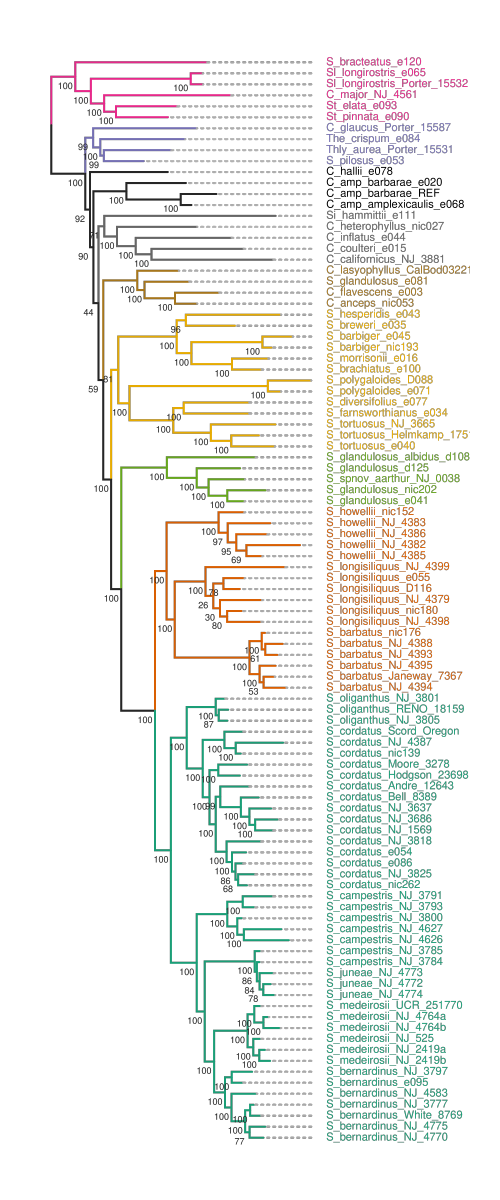

In [75]:
# load tree, root, and drop outgroups
tre = toytree.tree("../analysis-raxml/RAxML_bipartitions.strept-min20-r05")
tre = tre.root("A_thaliana_TAIR10")
tre = tre.drop_tips(["A_thaliana_TAIR10", "Sy_irio_NJ_3877", "reference", "S_irio"])

# clades to color
CLADES = {160,161,168,174,178,181,192,195}

# get tip colors
colors = ['black'] * tre.ntips
alltips = tre.get_tip_labels()
for cidx, clade in enumerate(CLADES):
    tips = tre.get_tip_labels(clade)
    for tip in tips:
        idx = alltips.index(tip)
        colors[idx] = toytree.darkcolors[cidx]

# draw with colored clades
canvas, axes, mark = tre.draw(
    height=1200,
    width=500,
    tip_labels_align=True,
    tip_labels_colors=colors,
    edge_colors=tre.get_edge_values_mapped(CLADES),
    node_labels="support",
    node_labels_style={"-toyplot-anchor-shift": "-10px", "baseline-shift": "-10px"}
);

# save figure
import toyplot.svg
toyplot.svg.render(canvas, "../figures/tree-raxml-strept-min20-r05-full.svg")
canvas

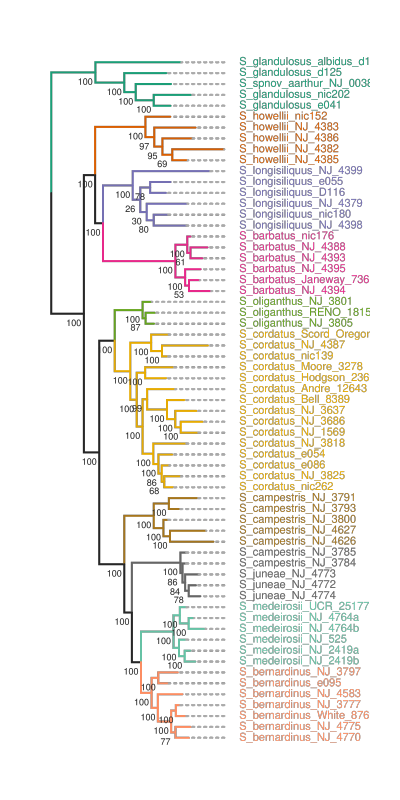

In [74]:
# load tree, root, and drop outgroups
tre = toytree.tree("../analysis-raxml/RAxML_bipartitions.strept-min20-r05")
tre = tre.root("A_thaliana_TAIR10")
tre = tre.drop_tips([i for i in tre.get_tip_labels() if i not in tre.get_tip_labels(177)])

# COLORS
COLORS = toytree.darkcolors + toytree.colors
SPECIES = [123, 117, 111, 110, 109, 108, 107, 96, 84, 83]

# get tip colors
colors = ['black'] * tre.ntips
alltips = tre.get_tip_labels()
for cidx, clade in enumerate(SPECIES):
    tips = tre.get_tip_labels(clade)
    for tip in tips:
        idx = alltips.index(tip)
        colors[idx] = COLORS[cidx]

# draw with colored clades
canvas, axes, mark = tre.draw(
    height=800,
    width=400,
    tip_labels_align=True,
    tip_labels_colors=colors,
    edge_colors=tre.get_edge_values_mapped(
        {i: COLORS[j] for (j, i) in enumerate(SPECIES)}
    ),
    node_labels="support",
    node_labels_style={"-toyplot-anchor-shift": "-10px", "baseline-shift": "-10px"}
);

# save figure
import toyplot.svg
toyplot.svg.render(canvas, "../figures/tree-raxml-strept-min20-r05-within.svg")
canvas